In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import streamlit as st

%matplotlib inline

In [3]:
df = pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


<AxesSubplot:xlabel='Sales'>

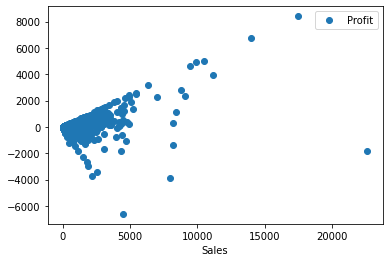

In [44]:
df.plot(x='Sales', y='Profit', style='o')

In [58]:
Profit = df[df.Profit>0]
Loss = df[df.Profit<0]
#Loss

<AxesSubplot:xlabel='Discount'>

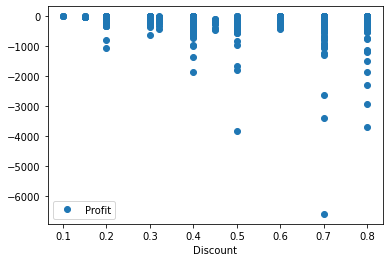

In [67]:
Loss.plot(x='Discount', y='Profit', style = 'o')

<AxesSubplot:xlabel='Discount'>

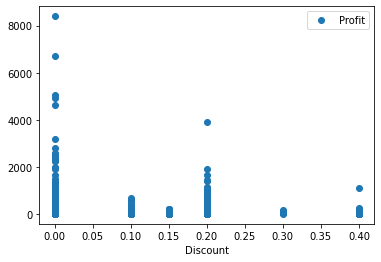

In [68]:
Profit.plot(x='Discount', y='Profit', style = 'o')

In [4]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
df["Ship Mode"].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [6]:
df.Category.unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [27]:
grouped = df.drop(['Postal Code'], axis=1).groupby(['Category', 'Ship Mode']).mean()
grouped

Sales  Quantity  Discount     Profit
Category        Ship Mode                                                
Furniture       First Class     338.625452  3.785933  0.180031   9.379044
                Same Day        328.981336  3.806723  0.186134   6.700407
                Second Class    366.016451  3.674473  0.172482   9.897568
                Standard Class  349.223933  3.820513  0.171651   8.301855
Office Supplies First Class     111.354186  3.705495  0.169231  20.220142
                Same Day         89.234604  3.518405  0.143558  19.704047
                Second Class    139.481773  3.888889  0.129167  23.496673
                Standard Class  117.630907  3.822705  0.164431  19.405933
Technology      First Class     463.008608  3.598007  0.133887  91.370643
                Same Day        613.508827  3.673469  0.140816  88.478483
                Second Class    388.583448  3.754098  0.130328  71.454116
                Standard Class  456.971382  3.809612  0.131793  76.829286

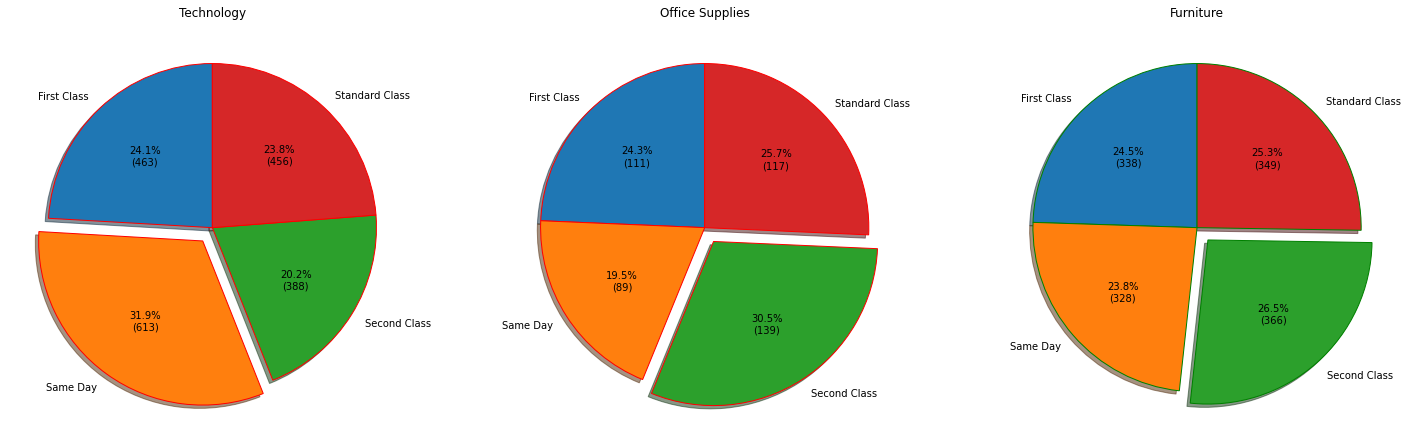

In [32]:
fig = plt.figure(figsize=(25,110))
ax1 = plt.subplot(1,3,1)
T = grouped.loc['Technology']
labels = ['First Class', 'Same Day', 'Second Class', 'Standard Class']

wp = { 'linewidth' : 1, 'edgecolor' : "red" } 
  
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%\n({:d})".format(pct, absolute) 

ax1.pie(T['Sales'], explode=(0,0.1,0,0), labels= labels, shadow = True, autopct = lambda pct: func(pct, T['Sales']), startangle = 90, wedgeprops = wp, textprops = dict(color ="black"))
ax1.set_title('Technology')

ax2 = plt.subplot(1,3,2)
OS = grouped.loc['Office Supplies']
labels = ['First Class', 'Same Day', 'Second Class', 'Standard Class']

wp = { 'linewidth' : 1, 'edgecolor' : "red" } 
  
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%\n({:d})".format(pct, absolute) 

ax2.pie(OS['Sales'], explode=(0,0,0.1,0), labels= labels, shadow = True, autopct = lambda pct: func(pct, OS['Sales']), startangle = 90, wedgeprops = wp, textprops = dict(color ="black"))
ax2.set_title('Office Supplies')

ax3 = plt.subplot(1,3,3)
F = grouped.loc['Furniture']
labels = ['First Class', 'Same Day', 'Second Class', 'Standard Class']

wp = { 'linewidth' : 1, 'edgecolor' : "green" } 
  
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%\n({:d})".format(pct, absolute) 

ax3.pie(F['Sales'], explode=(0,0,0.1,0), labels= labels, shadow = True, autopct = lambda pct: func(pct, F['Sales']), startangle = 90, wedgeprops = wp, textprops = dict(color ="black"))
ax3.set_title('Furniture')

#plt.legend(labels, loc ="lower right")
plt.show()

In [34]:
grouped = df.drop(['Postal Code'], axis=1).groupby(['Category', 'Segment']).mean()
grouped

Sales  Quantity  Discount     Profit
Category        Segment                                               
Furniture       Consumer     351.347091  3.743037  0.176739   6.281293
                Corporate    354.519792  3.862229  0.174071  11.741201
                Home Office  336.825131  3.776243  0.165000  10.705465
Office Supplies Consumer     116.390194  3.760154  0.158746  18.014174
                Corporate    126.745309  3.856044  0.160604  22.102923
                Home Office  115.309021  3.827618  0.147451  24.034439
Technology      Consumer     427.339534  3.782334  0.134385  74.445646
                Corporate    444.855810  3.781588  0.131949  79.723823
                Home Office  535.976658  3.646199  0.127193  89.152458

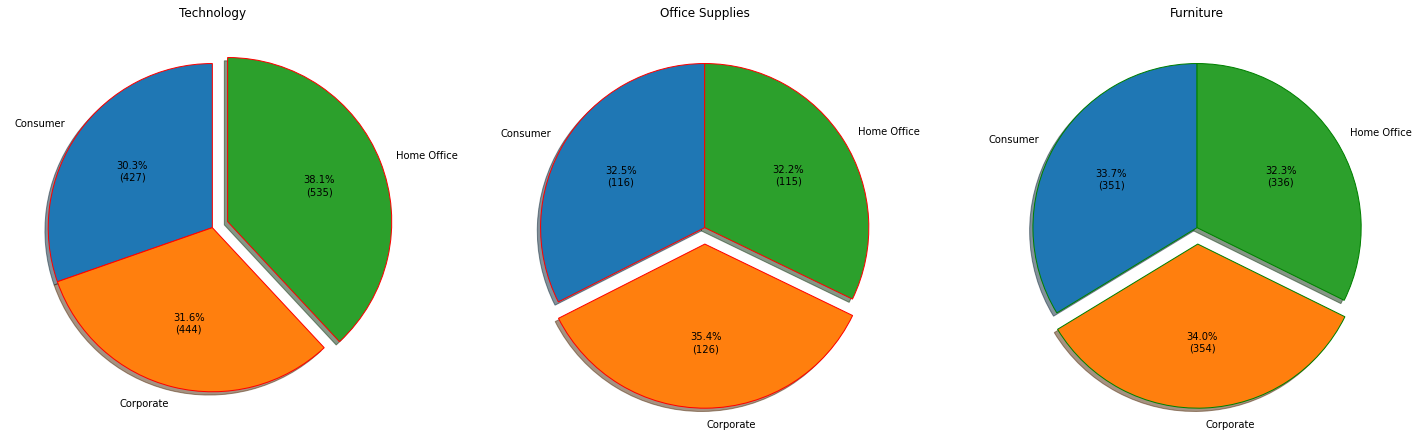

In [42]:
fig = plt.figure(figsize=(25,110))
ax1 = plt.subplot(1,3,1)
T = grouped.loc['Technology']
labels = ['Consumer', 'Corporate', 'Home Office']

wp = { 'linewidth' : 1, 'edgecolor' : "red" } 
  
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%\n({:d})".format(pct, absolute) 

ax1.pie(T['Sales'], explode=(0,0,0.1), labels= labels, shadow = True, autopct = lambda pct: func(pct, T['Sales']), startangle = 90, wedgeprops = wp, textprops = dict(color ="black"))
ax1.set_title('Technology')

ax2 = plt.subplot(1,3,2)
OS = grouped.loc['Office Supplies']

wp = { 'linewidth' : 1, 'edgecolor' : "red" } 
  
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%\n({:d})".format(pct, absolute) 

ax2.pie(OS['Sales'], explode=(0,0.1,0), labels= labels, shadow = True, autopct = lambda pct: func(pct, OS['Sales']), startangle = 90, wedgeprops = wp, textprops = dict(color ="black"))
ax2.set_title('Office Supplies')

ax3 = plt.subplot(1,3,3)
F = grouped.loc['Furniture']

wp = { 'linewidth' : 1, 'edgecolor' : "green" } 
  
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%\n({:d})".format(pct, absolute) 

ax3.pie(F['Sales'], explode=(0,0.1,0), labels= labels, shadow = True, autopct = lambda pct: func(pct, F['Sales']), startangle = 90, wedgeprops = wp, textprops = dict(color ="black"))
ax3.set_title('Furniture')

#plt.legend(labels, loc ="lower right")
plt.show()